# **PROYEK KEDUA : MEMBUAT MODEL NLP DENGAN DATA TIME SERIES 👨🏽‍💻**

* Name         : Lintang Nagari
* Email        : unggullintangg@gmail.com
* Linkedin     : <a href='https://www.linkedin.com/in/lintangnagari/'>Lintang Nagari</a>
* Id Dicoding  : <a href='https://www.dicoding.com/users/lnt_ngr/'>lnt_ngr</a>

**Berikut kriteria submission yang harus Anda penuhi:**


* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
* Harus menggunakan LSTM dalam arsitektur model.
* Validation set sebesar 20% dari total dataset.
* Model harus menggunakan model sequential.
* Harus menggunakan Learning Rate pada Optimizer.
* MAE < 10% skala data.

**Dataset : https://www.kaggle.com/datasets/shubhamcodez/berkeley-earth-daily-average-temperature**

### __IMPORT LIBRARY__

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### __DATAFRAME__

In [2]:
df = pd.read_csv('./dataset/Temperatures.csv')
df.head()

,Date,Day of Year,Anomaly,Temperature
0,1880-01-01,1,-0.69,7.95
1,1880-01-02,2,-0.59,8.05
2,1880-01-03,3,-0.67,7.97
3,1880-01-04,4,-0.62,8.03
4,1880-01-05,5,-0.68,7.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52077 entries, 0 to 52076
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         52077 non-null  object 
 1   Day of Year  52077 non-null  int64  
 2   Anomaly      52077 non-null  float64
 3   Temperature  52077 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
#Menghilangkan data yang tidak dibutuhkan

df.drop(['Day of Year', 'Anomaly'], axis = 1, inplace = True)
df.shape

(52077, 2)

In [5]:
Tanggal = df['Date'].values
Temperature  = df['Temperature'].values

### __VISUALISASI DATA TIME SERIES__

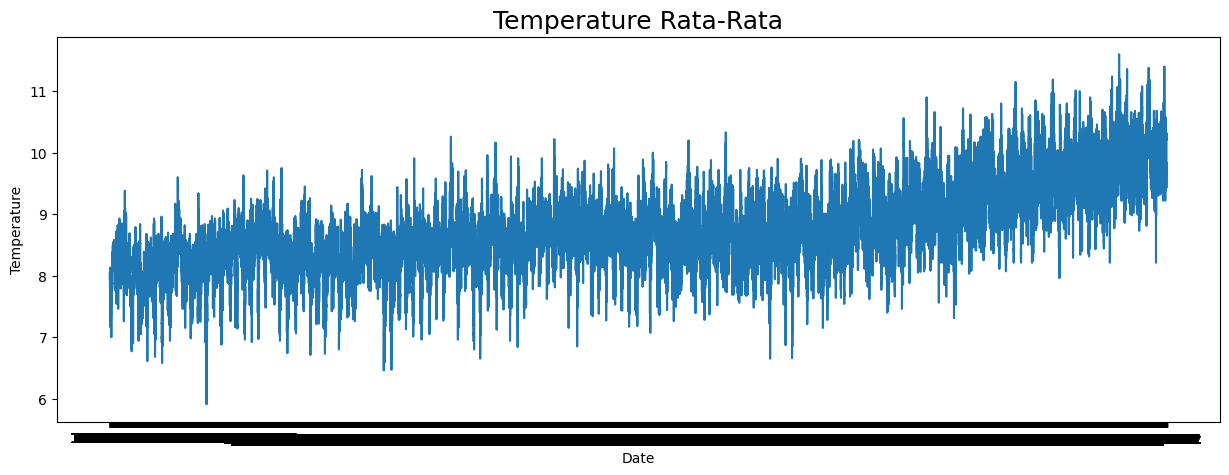

In [6]:

plt.figure(figsize=(15,5))
plt.plot(Tanggal, Temperature)
plt.title('Temperature Rata-Rata', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### __TRAINING AND TESTING__

In [7]:
Tanggal_latih, Tanggal_test, Temperature_latih, Temperature_test = train_test_split(Tanggal, Temperature, test_size=0.2, shuffle=False, random_state=123)

print("Total Nilai Training : ", len(Tanggal_latih))
print("Total Nilai Testing : ", len(Tanggal_test))

Total Nilai Training :  41661
Total Nilai Testing :  10416


In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

### __TRAINING MODEL__

In [9]:
train_set = windowed_dataset(Temperature_latih, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(Temperature_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, return_sequences=True,  input_shape=[None, 1]),
  tf.keras.layers.LSTM(30),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [10]:
minMae = (df['Temperature'].max() - df['Temperature'].min()) * 10/100
print("Batas maksimal nilai MAE pada model dari skala data sebesar", minMae)

Batas maksimal nilai MAE pada model dari skala data sebesar 0.569


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('mae')<minMae) & (logs.get('val_mae') < minMae):
      print('\nNilai MAE pada model telah mencapai < "10%"  skala data')
      self.model.stop_training = True
callbacks = myCallback()

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
    )
history = model.fit(
    train_set,
    epochs=100,
    validation_data=test_set,
    verbose=1,
    callbacks=[callbacks],
    )

Epoch 1/100
417/417 [==============================] - 14s 24ms/step - loss: 7.1435 - mae: 7.6435 - val_loss: 6.2097 - val_mae: 6.7097
Epoch 2/100
417/417 [==============================] - 8s 18ms/step - loss: 1.7392 - mae: 2.1872 - val_loss: 0.6472 - val_mae: 1.1060
Epoch 3/100
417/417 [==============================] - 8s 19ms/step - loss: 1.0144 - mae: 1.4432 - val_loss: 0.5518 - val_mae: 0.9950
Epoch 4/100
417/417 [==============================] - 9s 22ms/step - loss: 0.9180 - mae: 1.3419 - val_loss: 0.5597 - val_mae: 1.0047
Epoch 5/100
417/417 [==============================] - 12s 28ms/step - loss: 0.8423 - mae: 1.2603 - val_loss: 0.5452 - val_mae: 0.9887
Epoch 6/100
417/417 [==============================] - 9s 20ms/step - loss: 0.7733 - mae: 1.1849 - val_loss: 0.4744 - val_mae: 0.9047
Epoch 7/100
417/417 [==============================] - 9s 22ms/step - loss: 0.6984 - mae: 1.1020 - val_loss: 0.4171 - val_mae: 0.8378
Epoch 8/100
417/417 [==============================] - 10s 2

### __PLOTTING__

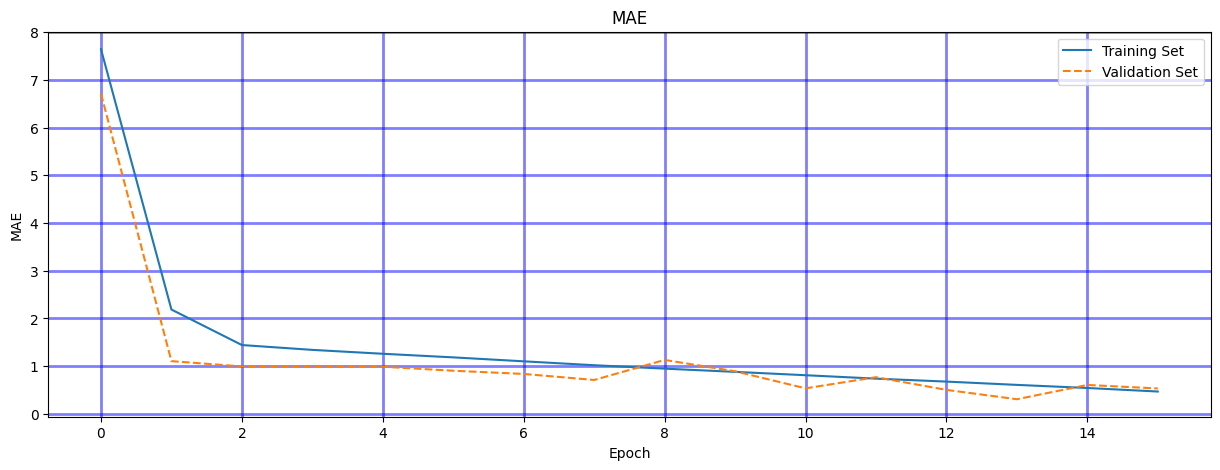

In [13]:
#MAE PLOT

plt.figure(figsize=(15, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'], linestyle='--')
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'])
plt.grid(color="b", linestyle='-', linewidth=2, alpha=0.5)

plt.show()

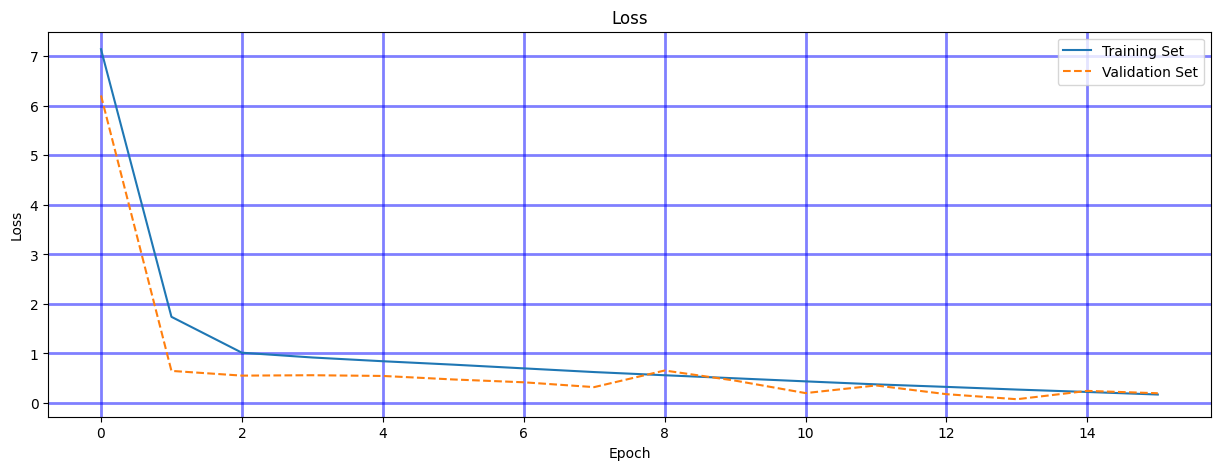

In [15]:
#LOSS PLOT

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], linestyle='--')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'])
plt.grid(color="b", linestyle='-', linewidth=2, alpha=0.5)

plt.show()